Seeding

In [1]:
# setting seeds
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing dependencies

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Data Curation

In [4]:
!pip install kaggle

In [5]:
kaggle_credentials = json.load(open("kaggle.json"))

In [6]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [7]:
!kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:33<00:00, 23.9MB/s]
100% 2.04G/2.04G [01:33<00:00, 23.5MB/s]


In [8]:
with ZipFile("plantvillage-dataset.zip", "r") as f:
  f.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Tomato___Early_blight', 'Tomato___Target_Spot', 'Grape___Black_rot', 'Tomato___Septoria_leaf_spot', 'Apple___Apple_scab']
38
['Tomato___Early_blight', 'Tomato___Target_Spot', 'Grape___Black_rot', 'Tomato___Septoria_leaf_spot', 'Apple___Apple_scab']
38
['Tomato___Early_blight', 'Tomato___Target_Spot', 'Grape___Black_rot', 'Tomato___Septoria_leaf_spot', 'Apple___Apple_scab']


38 classes

Data Preprocessing

In [11]:
base_dir = 'plantvillage dataset/color'

In [12]:
#image parameters
img_size = 224
batch_size = 32

Train-Test split

In [13]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [14]:
#train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [15]:
#test generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


CNN

In [60]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define model
model = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Explicit input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [61]:
#model summary
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,797,962 (182.33 MB)

 Trainable params: 47,797,962 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training

In [46]:
#training
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 69ms/step - accuracy: 0.6211 - loss: 1.5599 - val_accuracy: 0.8361 - val_loss: 0.5270
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 70ms/step - accuracy: 0.9254 - loss: 0.2328 - val_accuracy: 0.8813 - val_loss: 0.3891
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 145s 73ms/step - accuracy: 0.9689 - loss: 0.0943 - val_accuracy: 0.8478 - val_loss: 0.6031
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.9785 - loss: 0.0711 - val_accuracy: 0.8721 - val_loss: 0.5825
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 104ms/step - accuracy: 0.9775 - loss: 0.0786 - val_accuracy: 0.8812 - val_loss: 0.5492


Evaluation

In [47]:
#model evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8753 - loss: 0.5765
accuracy: 88.12%


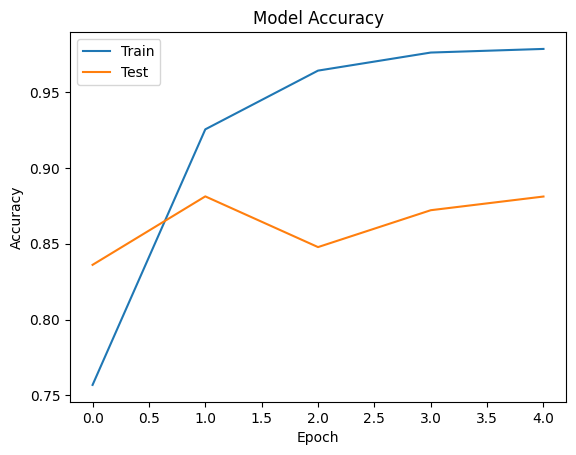

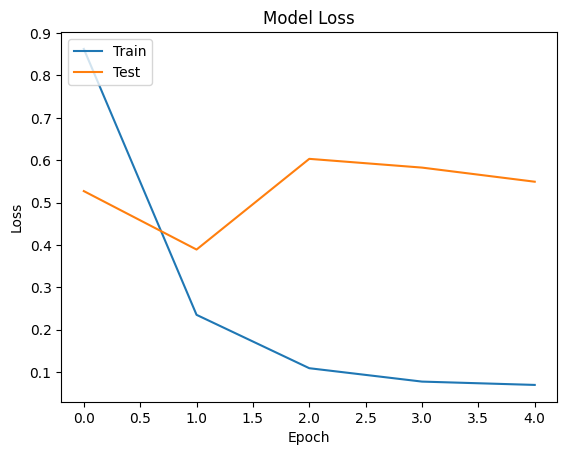

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [49]:
def load_and_preprocess_img(img_path, target_size=(224,224)):
  img = Image.open(img_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array.astype('float32')/255.
  return img_array

def predit_img_class(model, img_path, class_indices):
  preprocessed_img = load_and_preprocess_img(img_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [50]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [51]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [52]:
json.dump(class_indices, open("class_indices.json", "w"))

In [36]:
#example
img_path = '/content/test3.jpg'
# img_path = '/content/black_rot.jpg'
# img_path = '/content/test_apple_blackrot.png'
predicted_class = predit_img_class(model, img_path, class_indices)
print(f"Predicted class name: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class name: Apple___Black_rot


In [53]:
model.save('plant_disease_prediction_model.keras')

In [63]:
model.save('drive/MyDrive/PlantMLmodel/plant_disease_prediction_model.keras')